In [1]:
from keras.datasets import imdb

#IMDB資料集有5萬條來自網路電影資料庫的評論；其中2萬5千條用來訓練，2萬5千條用來測試，每個部分正負評論各佔50%.
#劃分訓練集、測試集的必要性：不能在相同的資料集上對機器學習模型進行測試。因為在訓練集上模型表現好並不意味著泛化能力好(在沒有見過的資料上仍然表現良好)，而我們關心的是模型的泛化能力。

#載入資料 
(train_data , train_labels),(test_data , test_labels) = imdb.load_data(num_words=10000) # num_words=10000意味著只保留訓練集中最常出現的前10000個詞

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
print(train_data[0]) #每個數字代表著不同的英文字，組合起來就是一句評論。 #此為第一則評論，train_data裡一共有25000則。

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train_labels[0]) # label = 0 代表此為負面評論 ； label = 1 代表此為正面評論 #第一則為正面評論

1


In [ ]:
# 將整數 list 編碼成二元矩陣
#import numpy as np  

#def vectorize_sequences(sequences, dimension=10000):
#    results = np.zeros((len(sequences), dimension))
#    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
#        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
#    return results


#x_train = vectorize_sequences(train_data)  #向量化訓練資料
#x_test = vectorize_sequences(test_data)  #向量化測試資料

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer 
import numpy as np  

#將每則評論有出現的數字(英文字)轉換成 1 ，沒出現的轉換成 0 ， 把train_data變成(25000*10000)的shape

tok = Tokenizer(num_words=10000)           #指定字典的總字數為10000 (設定10000是因為我們抓取最常出現的前10000個詞)
x_train = tok.sequences_to_matrix(train_data) #將訓練樣本做 multi-hot 編碼
y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤

x_test  = tok.sequences_to_matrix(test_data) #將測試樣本做 multi-hot 編碼
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

In [10]:
print(x_train[0]) #代表數字 0 沒出現在評論中，而數字 1 & 2 有出現

[0. 1. 1. ... 0. 0. 0.]


In [11]:
#建構模型

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,))) #輸入層
model.add(layers.Dense(16,activation='relu')) #隱藏層
model.add(layers.Dense(1,activation='sigmoid')) #輸出層 #最後輸出 0 or 1 來判別是正面或是負面評論

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
#選擇損失函式和優化演算法。因為是二分類問題，網路模型的輸出是一個概率，最好使用binary_crossentropy損失函式，也可以使用mean_squared_error均方誤差損失函式。但是交叉熵是處理模型輸出為概率時最佳選擇。

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#創造驗證集(validation datasets)
#為了在訓練過程中在沒有見過資料上監測準確率變化，需要分出一個驗證集。從訓練集中分出10000條做驗證集。

x_val = x_train[:10000] #前10000筆資料
y_val = y_train[:10000]

partial_x_train = x_train[10000:] #後15000筆資料
partial_y_train = y_train[10000:]

In [15]:
#在512小批量，迭代20次進行模型訓練，同時在驗證集上監測準確率變化。
train = model.fit(partial_x_train , partial_y_train , epochs=20 , batch_size=512 , validation_data=(x_val , y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5248 - accuracy: 0.7841 - val_loss: 0.3976 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3132 - accuracy: 0.9030 - val_loss: 0.3119 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2312 - accuracy: 0.9273 - val_loss: 0.2929 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1850 - accuracy: 0.9415 - val_loss: 0.2748 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1512 - accuracy: 0.9514 - val_loss: 0.2848 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1251 - accuracy: 0.9618 - val_loss: 0.2868 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1051 - accuracy: 0.9691 - val_loss: 0.3000 - val_accuracy: 0.8837
Epoch 8/20
30

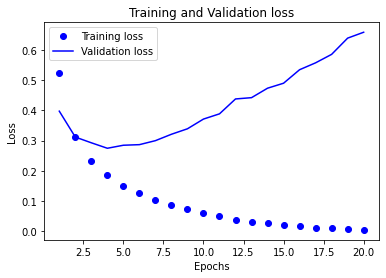

In [25]:
#畫出訓練損失和驗證損失的變化圖：
import matplotlib.pyplot as plt

loss_values = train.history['loss']
val_loss_values = train.history['val_loss']
epochs = range(1, len(train.history['accuracy'])+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo:blue dot藍點
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b: blue藍色
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

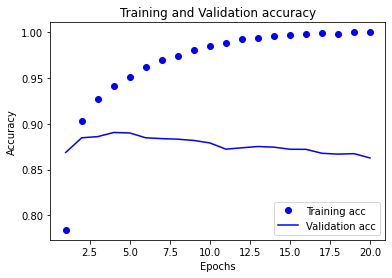

In [24]:
#畫出訓練集和驗證集上準確率變化

plt.clf()
acc_values = train.history['accuracy']
val_acc_values = train.history['val_accuracy']
plt.plot(epochs, acc_values , 'bo', label='Training acc')
plt.plot(epochs, val_acc_values , 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [28]:
#驗證損失和驗證集上的準確率在第4次迭代左右開始變差，表示在沒有見過的資料上表現很差(泛化能力差)。
#重新訓練，使模型在第4次epoch時結束

model_2 = models.Sequential()
model_2.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model_2.add(layers.Dense(16,activation='relu'))
model_2.add(layers.Dense(1,activation='sigmoid'))
model_2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
train_2 = model_2.fit(x_train , y_train , epochs=4 , batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4553 - accuracy: 0.8257
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2634 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2015 - accuracy: 0.9278
Epoch 4/4
49/49 [==============================] - 2s 42ms/step - loss: 0.1696 - accuracy: 0.9394


In [29]:
loss, acc = model_2.evaluate(x_test, y_test, verbose=2)  #評估訓練成效
print('評估測試資料的準確率 =', acc)

782/782 - 1s - loss: 0.2988 - accuracy: 0.8827 - 1s/epoch - 2ms/step
評估測試資料的準確率 = 0.8827199935913086


In [33]:
#使用訓練好的模型做預測
#使用predict函式對資料進行預測，給出為正面評論的概率。

print(model_2.predict(x_test)) #此為重新訓練後的模型
print(y_test)

[[0.13119167]
 [0.99947894]
 [0.8540241 ]
 ...
 [0.08508584]
 [0.04507062]
 [0.47667795]]
[0. 1. 1. ... 0. 0. 0.]


In [35]:
print(model.predict(x_test)) #此為過擬合的模型(第一次跑的)
print(y_test)

[[0.01771519]
 [1.        ]
 [0.76416284]
 ...
 [0.04198626]
 [0.02554297]
 [0.88765657]]
[0. 1. 1. ... 0. 0. 0.]


In [ ]:
#從上面兩個預測可以看出最後一筆資料的差異，在過擬合的模型中，最後一筆判別為正面評論的機率是88%，但實際是負面的；而重新訓練過的模型判別為正面評論的機率是47%，相對較準確。